<a href="https://colab.research.google.com/github/mukaseevru/ds-school/blob/main/final_project/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LSTM для задачи Регрессии

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(21)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.getcwd()

'/content'

In [4]:
# Файл можно скачать здесь: https://drive.google.com/file/d/1cufAlNfUty79rTqoumz0eaYad0ZZI-5z/view?usp=sharing
views = pd.read_csv('drive/MyDrive/Colab Notebooks/sber/news/data/views.csv')
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   10941428  121 non-null    int64
 1   10941427  121 non-null    int64
 2   10941426  121 non-null    int64
 3   10941425  121 non-null    int64
 4   10941422  121 non-null    int64
 5   10941421  121 non-null    int64
 6   10941419  121 non-null    int64
 7   10941417  121 non-null    int64
 8   10941416  121 non-null    int64
 9   10941415  121 non-null    int64
dtypes: int64(10)
memory usage: 9.6 KB


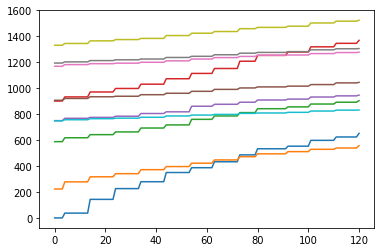

In [5]:
plt.plot(views)
plt.show()

In [6]:
dataset = views[views.columns[0]].values.reshape(-1, 1)
dataset = dataset.astype('float32')
dataset

array([[  0.],
       [  0.],
       [  0.],
       [  0.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [ 37.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [143.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [226.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [279.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [350.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [387.],
       [433.],
       [433.],
       [433.],
       [43

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

84 37


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
print('Train X: \n')
print(trainX[:7])
print('Train Y: \n')
print(trainY[:7])

Train X: 

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05674846]
 [0.05674846]
 [0.05674846]]
Train Y: 

[0.         0.         0.         0.05674846 0.05674846 0.05674846
 0.05674846]


In [12]:
print(trainX.shape, trainY.shape)

(82, 1) (82,)


In [13]:
print(testX.shape, testY.shape)

(35, 1) (35,)


In [14]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
82/82 - 1s - loss: 0.2301
Epoch 2/100
82/82 - 0s - loss: 0.1277
Epoch 3/100
82/82 - 0s - loss: 0.0725
Epoch 4/100
82/82 - 0s - loss: 0.0487
Epoch 5/100
82/82 - 0s - loss: 0.0401
Epoch 6/100
82/82 - 0s - loss: 0.0363
Epoch 7/100
82/82 - 0s - loss: 0.0332
Epoch 8/100
82/82 - 0s - loss: 0.0304
Epoch 9/100
82/82 - 0s - loss: 0.0271
Epoch 10/100
82/82 - 0s - loss: 0.0245
Epoch 11/100
82/82 - 0s - loss: 0.0219
Epoch 12/100
82/82 - 0s - loss: 0.0191
Epoch 13/100
82/82 - 0s - loss: 0.0167
Epoch 14/100
82/82 - 0s - loss: 0.0145
Epoch 15/100
82/82 - 0s - loss: 0.0124
Epoch 16/100
82/82 - 0s - loss: 0.0106
Epoch 17/100
82/82 - 0s - loss: 0.0088
Epoch 18/100
82/82 - 0s - loss: 0.0073
Epoch 19/100
82/82 - 0s - loss: 0.0061
Epoch 20/100
82/82 - 0s - loss: 0.0049
Epoch 21/100
82/82 - 0s - loss: 0.0040
Epoch 22/100
82/82 - 0s - loss: 0.0032
Epoch 23/100
82/82 - 0s - loss: 0.0027
Epoch 24/100
82/82 - 0s - loss: 0.0022
Epoch 25/100
82/82 - 0s - loss: 0.0019
Epoch 26/100
82/82 - 0s - loss: 0.

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.63 RMSE
Test Score: 13.36 RMSE


In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2) +
                1:len(dataset)-1, :] = testPredict

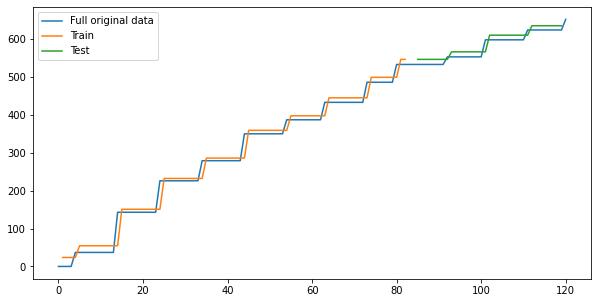

In [18]:
# plot baseline and predictions
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(dataset), label='Full original data')
plt.plot(trainPredictPlot, label='Train')
plt.plot(testPredictPlot, label='Test')
plt.legend()
plt.show()

# 2. LSTM для Регрессии с использованием оконного метода

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
dataset = views[views.columns[0]].values.reshape(-1, 1)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
print('Train X: \n')
print(trainX[:])
print('Train Y: \n')
print(trainY[:])

Train X: 

[[[0.         0.         0.        ]]

 [[0.         0.         0.        ]]

 [[0.         0.         0.05674846]]

 [[0.         0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.05674846]]

 [[0.05674846 0.05674846 0.21932516]]

 [[0.05674846 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.21932516]]

 [[0.21932516 0.21932516 0.34662575]]

 [[0.21932516 0.34662575 0.34662575]]

 [[0.34662575 0.34662575 0.34662575]]

 [[0.34662575 

In [22]:
print('Test X: \n')
print(testX[:])
print('Test Y: \n')
print(testY[:])

Test X: 

[[[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8174846]]

 [[0.8174846 0.8174846 0.8481595]]

 [[0.8174846 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.8481595]]

 [[0.8481595 0.8481595 0.9171779]]

 [[0.8481595 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9171779]]

 [[0.9171779 0.9171779 0.9570552]]

 [[0.9171779 0.9570552 0.9570552]]

 [[0.9570552 0.957

In [23]:
print(trainX.shape, trainY.shape)

(80, 1, 3) (80,)


In [24]:
print(testX.shape, testY.shape)

(33, 1, 3) (33,)


Epoch 1/100
80/80 - 2s - loss: 0.1091
Epoch 2/100
80/80 - 0s - loss: 0.0343
Epoch 3/100
80/80 - 0s - loss: 0.0126
Epoch 4/100
80/80 - 0s - loss: 0.0089
Epoch 5/100
80/80 - 0s - loss: 0.0071
Epoch 6/100
80/80 - 0s - loss: 0.0056
Epoch 7/100
80/80 - 0s - loss: 0.0043
Epoch 8/100
80/80 - 0s - loss: 0.0033
Epoch 9/100
80/80 - 0s - loss: 0.0025
Epoch 10/100
80/80 - 0s - loss: 0.0021
Epoch 11/100
80/80 - 0s - loss: 0.0017
Epoch 12/100
80/80 - 0s - loss: 0.0015
Epoch 13/100
80/80 - 0s - loss: 0.0013
Epoch 14/100
80/80 - 0s - loss: 0.0013
Epoch 15/100
80/80 - 0s - loss: 0.0012
Epoch 16/100
80/80 - 0s - loss: 0.0012
Epoch 17/100
80/80 - 0s - loss: 0.0012
Epoch 18/100
80/80 - 0s - loss: 0.0012
Epoch 19/100
80/80 - 0s - loss: 0.0012
Epoch 20/100
80/80 - 0s - loss: 0.0013
Epoch 21/100
80/80 - 0s - loss: 0.0012
Epoch 22/100
80/80 - 0s - loss: 0.0012
Epoch 23/100
80/80 - 0s - loss: 0.0012
Epoch 24/100
80/80 - 0s - loss: 0.0012
Epoch 25/100
80/80 - 0s - loss: 0.0012
Epoch 26/100
80/80 - 0s - loss: 0.

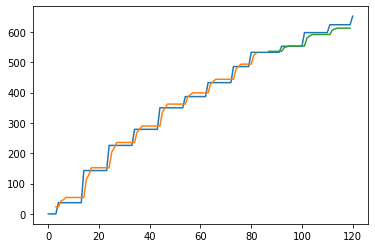

In [25]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2) +
                1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 3. LSTM для регрессии с  Time Steps

In [26]:
dataset = views[views.columns[0]].values.reshape(-1, 1)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [27]:
print('Train X: \n')
print(trainX[:7])
print('Train Y: \n')
print(trainY[:7])

Train X: 

[[[0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.05674846]]

 [[0.        ]
  [0.05674846]
  [0.05674846]]

 [[0.05674846]
  [0.05674846]
  [0.05674846]]

 [[0.05674846]
  [0.05674846]
  [0.05674846]]

 [[0.05674846]
  [0.05674846]
  [0.05674846]]]
Train Y: 

[0.         0.05674846 0.05674846 0.05674846 0.05674846 0.05674846
 0.05674846]


In [28]:
print(trainX.shape, trainY.shape)

(77, 3, 1) (77,)


In [29]:
print(testX.shape, testY.shape)

(36, 3, 1) (36,)


In [30]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2) +
                1:len(dataset)-1, :] = testPredict

Epoch 1/100
77/77 - 1s - loss: 0.2229
Epoch 2/100
77/77 - 0s - loss: 0.1218
Epoch 3/100
77/77 - 0s - loss: 0.0575
Epoch 4/100
77/77 - 0s - loss: 0.0367
Epoch 5/100
77/77 - 0s - loss: 0.0309
Epoch 6/100
77/77 - 0s - loss: 0.0266
Epoch 7/100
77/77 - 0s - loss: 0.0226
Epoch 8/100
77/77 - 0s - loss: 0.0190
Epoch 9/100
77/77 - 0s - loss: 0.0156
Epoch 10/100
77/77 - 0s - loss: 0.0124
Epoch 11/100
77/77 - 0s - loss: 0.0097
Epoch 12/100
77/77 - 0s - loss: 0.0073
Epoch 13/100
77/77 - 0s - loss: 0.0054
Epoch 14/100
77/77 - 0s - loss: 0.0040
Epoch 15/100
77/77 - 0s - loss: 0.0030
Epoch 16/100
77/77 - 0s - loss: 0.0023
Epoch 17/100
77/77 - 0s - loss: 0.0018
Epoch 18/100
77/77 - 0s - loss: 0.0017
Epoch 19/100
77/77 - 0s - loss: 0.0015
Epoch 20/100
77/77 - 0s - loss: 0.0014
Epoch 21/100
77/77 - 0s - loss: 0.0014
Epoch 22/100
77/77 - 0s - loss: 0.0014
Epoch 23/100
77/77 - 0s - loss: 0.0014
Epoch 24/100
77/77 - 0s - loss: 0.0014
Epoch 25/100
77/77 - 0s - loss: 0.0014
Epoch 26/100
77/77 - 0s - loss: 0.

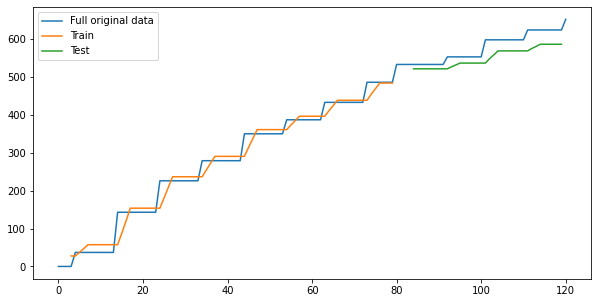

In [31]:
# plot baseline and predictions
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(dataset), label='Full original data')
plt.plot(trainPredictPlot, label='Train')
plt.plot(testPredictPlot, label='Test')
plt.legend()
plt.show()